### Análise de sentimento

Dessa vez vamos utilizar redes neurais para classificação de sentimento. A ultima vez que trabalhamos com isso usamos [naive bayes e uma pequena amostra de dados somente para teste](../classification-vector-spaces-in-nlp/Lab%20-%2002.ipynb). 

In [3]:
import pandas as pd
data = pd.read_csv("datasets/training.1600000.processed.noemoticon.csv")
data.head()

,class,id,date,hasQuery,user,message
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=.6)

### Vetorização

O processo de vetorização com padding usando o keras é muito simples. Basta criar uma instancia de TextVectorization e mandar os dados que a vetorização será realizada com padding.

O que é padding ? Nada mais que um offset para deixar todos os vetores de mesmo tamanho. Importante ter em mente que o vocavulário é criado no método adapt, isto é, a instância do [<code>TextVectorization</code>](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) irá conter um vocabulário 

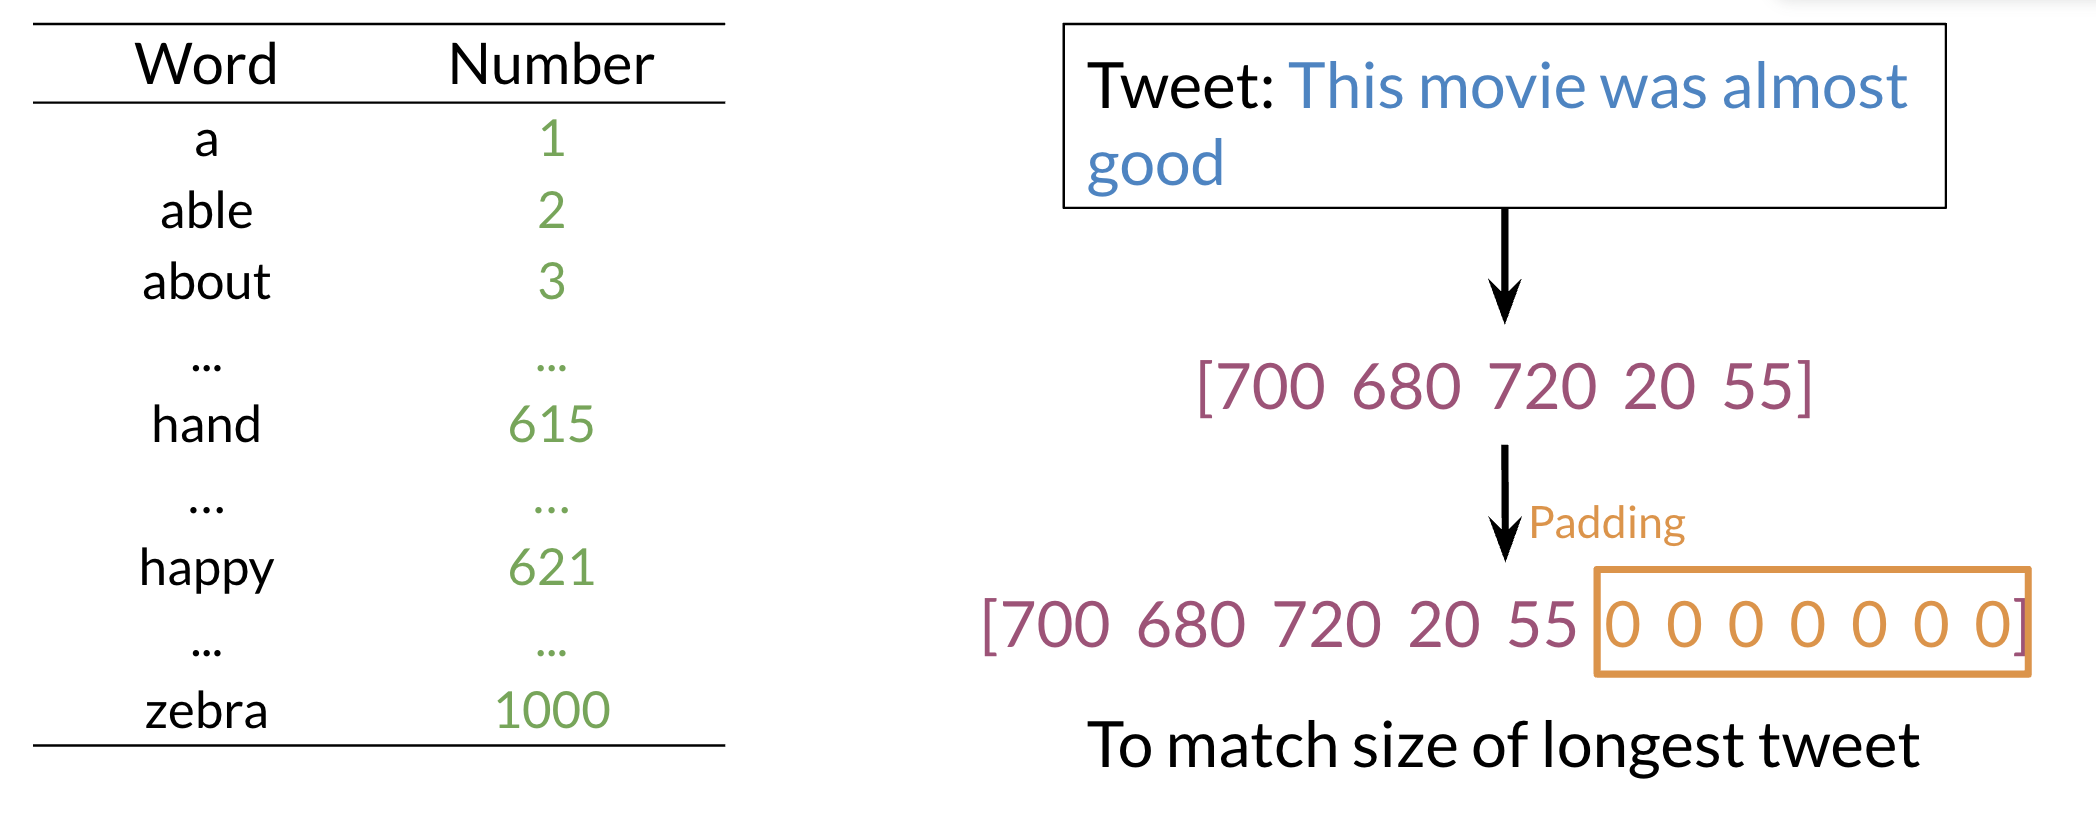

In [6]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(output_mode = "int", max_tokens=5000)
vectorizer.adapt(train.message.to_list())

<tf.Tensor: shape=(640000, 37), dtype=int64, numpy=
array([[   1,  163,   10, ...,    0,    0,    0],
       [  38, 4941,    3, ...,    0,    0,    0],
       [   1,  140,   10, ...,    0,    0,    0],
       ...,
       [   1, 2532,    7, ...,    0,    0,    0],
       [   1,    2,   27, ...,    0,    0,    0],
       [   2, 2035,    5, ...,    0,    0,    0]], dtype=int64)>

### O que o embending vai fazer ? 

A gente já sabe que o embending é um vetor que representa uma palavra. Nesse caso, ele vai transformar os inteiros do vetor gerado (que são palavras) em vetores. Assim teremos um vetor de vetores.

Nesse caso, <code>Embedding</code> recebe 3 parâmetros importantes. O input_dim, que equivale a dimensão ou o total de palavras do vocabulário. Recebe também o output_dim que é o tamanho do vetor que cada palavra será transformada. Por ultimo, recebe input_length que nada mais é do que o tamanho dos vetores-frases com padding.

### Softmax

Usei uma softmax para resultado visto que eu tenho 2 classes que tão sendo usadas (no momento) para os meu treino. A classe 0 que é um feedback negativo e a classe 4 que é um feedback positivo. também tem a classe 2 que é neutro, mas não usei aqui.

### One hot
Para trabalhar nessa rede neural, já que eu tô usando softmax como saída eu coloquei um <code>get_dummies</code> para transformar as classes em vetores zero-um.

### Adam Optimizer
Ainda falta eu fazer um estudo sobre optimizadores, mas 

In [58]:
from tensorflow import keras

try:
    print(my_tensor.shape)
except:
    my_tensor = vectorizer(train.message)
    my_tensor = my_tensor.numpy()

model = keras.Sequential([
    keras.layers.Embedding(len(vectorizer.get_vocabulary()), 100, input_length= my_tensor.shape[1]),
    keras.layers.Flatten(),
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(units=2, activation='softmax'),
])

model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    x = my_tensor,
    y = pd.get_dummies(train["class"]).to_numpy(), 
    epochs=10, 
    steps_per_epoch=100,
)

(640000, 37)
Epoch 1/10
100/100 [==============================] - 13s 130ms/step - loss: 0.5201 - accuracy: 0.7355
Epoch 2/10
100/100 [==============================] - 14s 137ms/step - loss: 0.4369 - accuracy: 0.7974
Epoch 3/10
100/100 [==============================] - 14s 136ms/step - loss: 0.4219 - accuracy: 0.8054
Epoch 4/10
100/100 [==============================] - 14s 136ms/step - loss: 0.4066 - accuracy: 0.8130
Epoch 5/10
100/100 [==============================] - 13s 135ms/step - loss: 0.3884 - accuracy: 0.8232
Epoch 6/10
100/100 [==============================] - 14s 136ms/step - loss: 0.3707 - accuracy: 0.8329
Epoch 7/10
100/100 [==============================] - 14s 137ms/step - loss: 0.3528 - accuracy: 0.8432
Epoch 8/10
100/100 [==============================] - 14s 138ms/step - loss: 0.3360 - accuracy: 0.8520
Epoch 9/10
100/100 [==============================] - 14s 144ms/step - loss: 0.3190 - accuracy: 0.8609
Epoch 10/10
100/100 [==============================] - 14s 1

In [20]:
len(train["class"].to_list()),my_tensor.shape

(640000, TensorShape([640000, 37]))

array([[   1,  163,   10, ...,    0,    0,    0],
       [  38, 4941,    3, ...,    0,    0,    0],
       [   1,  140,   10, ...,    0,    0,    0],
       ...,
       [   1, 2532,    7, ...,    0,    0,    0],
       [   1,    2,   27, ...,    0,    0,    0],
       [   2, 2035,    5, ...,    0,    0,    0]], dtype=int64)

In [44]:
pd.get_dummies(train["class"]).to_numpy().sum(axis = 0)

array([319971, 320029], dtype=uint32)